In [1]:
import pandas as pd
from shutil import copyfile
import os
import seaborn as sns

In [2]:
src = "../data/bigtable.csv"
dst = "./bigtable.csv"
if os.path.exists(dst):
    os.remove(dst)
copyfile(src, dst)

'./bigtable.csv'

In [3]:
df = pd.read_csv(dst)
df.tail()

,datetime,pm25,type,sensor,station_id,x,y,population,dist-mroads,dist-setl,...,DEW,SKY,VIS,ATM,Wind-Dir,Wind-Rate,sin_wind,cos_wind,AQI_class,AQI_VALUE
105393,2019-10-27 18:00:00+00:00,2.0,AirNow,ND,DC_EPA,38.89475,-76.95343,3.510231,0.093,-0.216,...,20.01,22000.0,16000.0,1008.01,310.0,4.6,-0.766044,6.427876e-01,Good,6.493506
105394,2019-10-27 18:00:00+00:00,5.0,AirNow,ND,MA_EPA,39.11440,-77.10690,0.094436,0.378,0.405,...,20.01,22000.0,16000.0,1008.01,310.0,4.6,-0.766044,6.427876e-01,Good,16.233766
105395,2019-10-27 18:00:00+00:00,2.0,AirNow,ND,MA_EPA,39.05530,-76.87830,0.094436,0.378,0.405,...,20.01,22000.0,16000.0,1008.01,310.0,4.6,-0.766044,6.427876e-01,Good,6.493506
105396,2019-10-27 18:00:00+00:00,7.0,AirNow,ND,DC_EPA,38.87516,-77.01282,3.510231,0.093,-0.216,...,20.01,22000.0,16000.0,1008.01,310.0,4.6,-0.766044,6.427876e-01,Good,22.727273
105397,2019-10-27 08:00:00+00:00,5.6,AirNow,ND,VA_EPA,38.77170,-77.10890,3.400232,0.118,0.000,...,16.15,366.0,8047.0,9999.99,90.0,1.5,1.000000,6.123234e-17,Good,18.181818


In [4]:
df.columns

Index(['datetime', 'pm25', 'type', 'sensor', 'station_id', 'x', 'y',
       'population', 'dist-mroads', 'dist-setl', 'dist-coast', 'dist-forest',
       'slope', 'elevation', 'dayofweek', 'sin_day', 'cos_day', 'sin_year',
       'cos_year', 'TEMP', 'DEW', 'SKY', 'VIS', 'ATM', 'Wind-Dir', 'Wind-Rate',
       'sin_wind', 'cos_wind', 'AQI_class', 'AQI_VALUE'],
      dtype='object')

In [5]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

sns.set(style="ticks", color_codes=True)
df2=df.drop(["datetime", "type", "sensor", "station_id", "x", "y", "Wind-Dir"], axis=1)
array = df2.values
print(len(array))
print(len(array[0]))

X = array[:,1:16]
Y = array[:,0]



105398
23


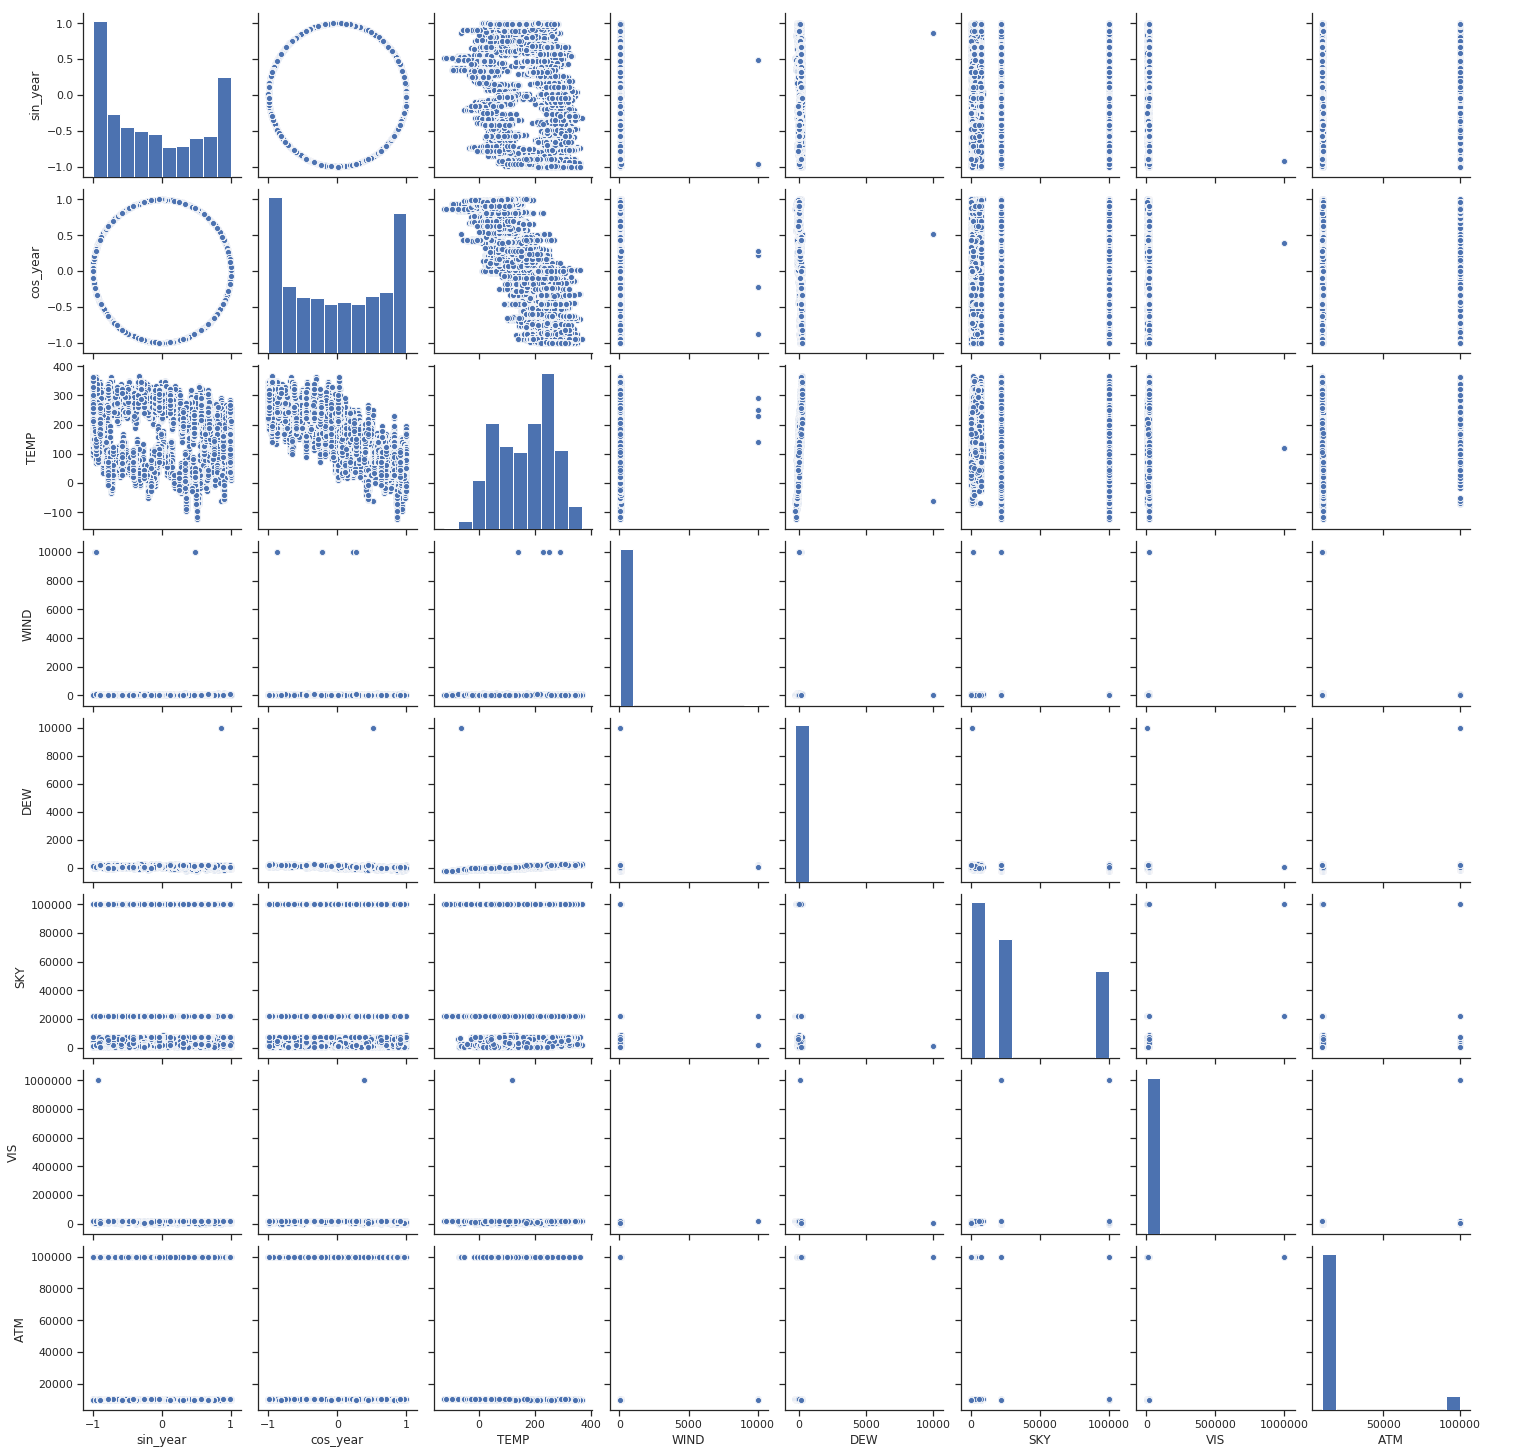

In [6]:
sns.pairplot(df2.drop(["pm25", "AQI_VALUE", 'population', 'dist-mroads', 'dist-setl', 'dist-coast', 'dist-forest', 'slope', 'elevation', 'dayofweek', 'sin_day', 'cos_day', "AQI_class"], axis=1))

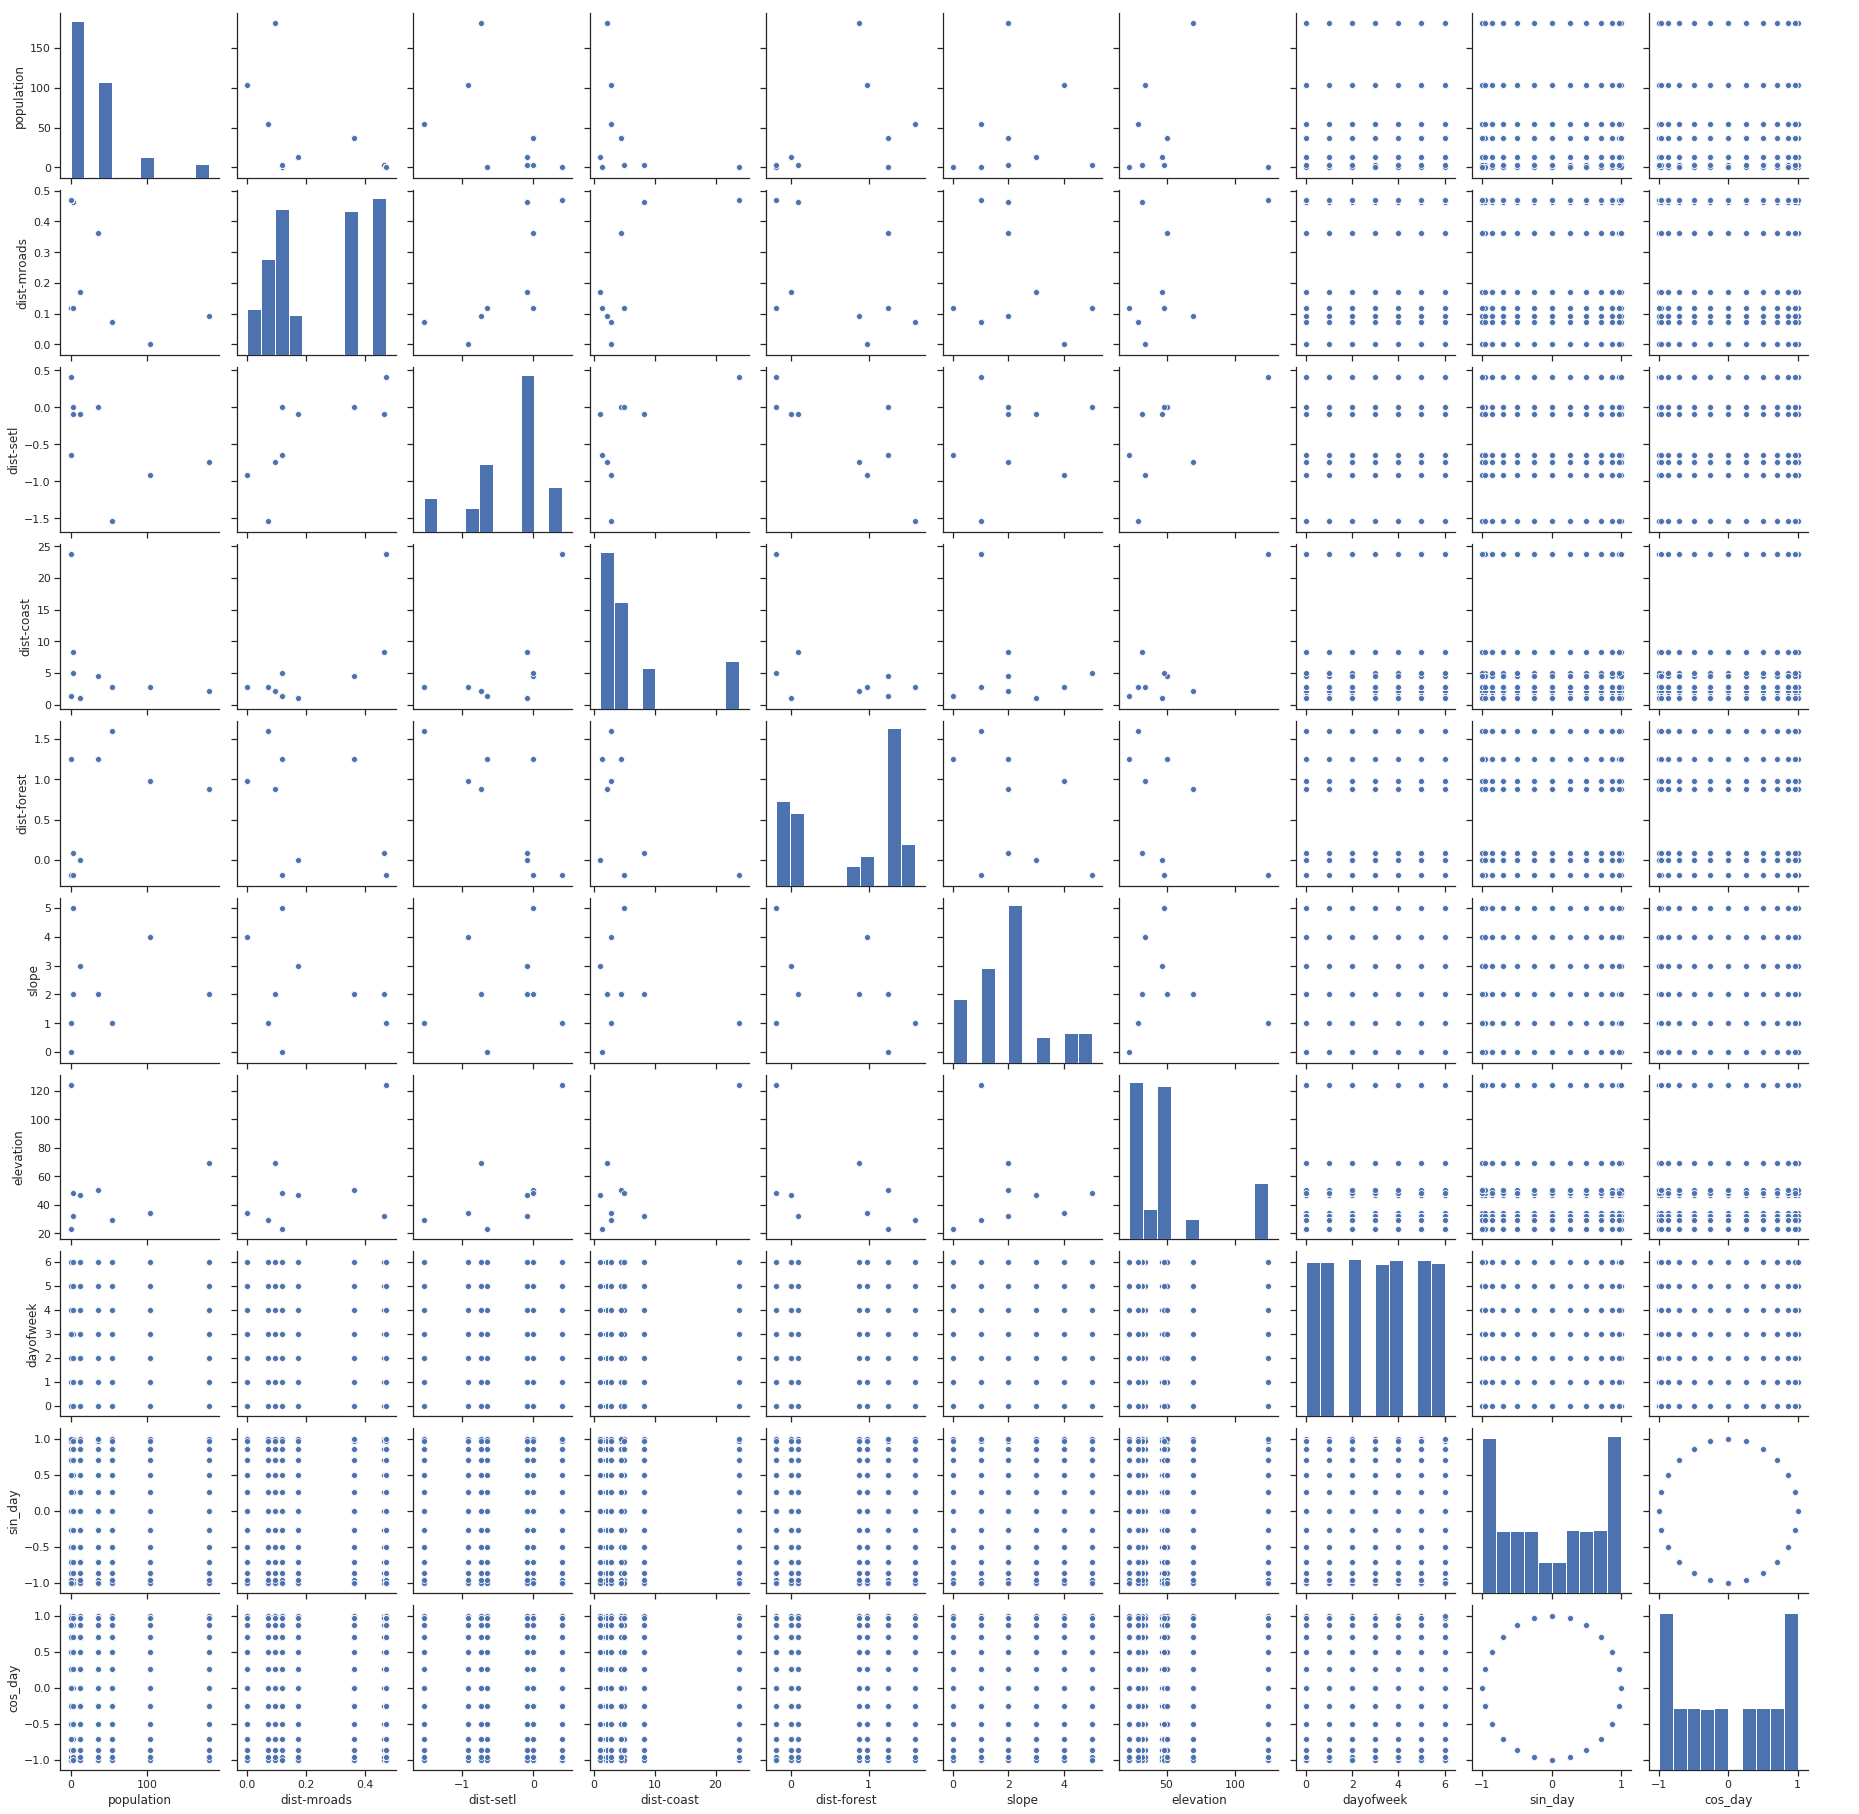

In [7]:
sns.pairplot(df2.drop(["pm25", "AQI_VALUE", 'sin_year', 'cos_year', 'TEMP', 'WIND', 'DEW', 'SKY', 'VIS', 'ATM', "AQI_class"], axis=1))

In [6]:
# Feature Selection with Univariate Statistical Tests

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

df2=df.drop(["datetime", "type", "sensor", "station_id", "x", "y"], axis=1)
array = df2.values
print(len(array))
print(len(array[0]))

X = array[:,1:16]
Y = array[:,0]

# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

105398
24


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').